In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('data/Google_Stock_Price_Train.csv')
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
train_set = train_df.iloc[:,1:2].to_numpy()

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
sc = MinMaxScaler()
train_set_scaled = sc.fit_transform(train_set)

In [6]:
X_train = []
y_train = []
for i in range(60, len(train_set_scaled)):
    X_train.append(train_set_scaled[i-60:i,0])
    y_train.append(train_set_scaled[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [9]:
lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm.add(Dropout(0.20))
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(Dropout(0.20))
lstm.add(LSTM(units=50, return_sequences=True))
lstm.add(Dropout(0.20))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.20))
lstm.add(Dense(units=1))

In [10]:
lstm.compile(optimizer='Adam', loss='mean_squared_error')

In [11]:
history = lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 7s 61ms/step - loss: 0.0993
Epoch 2/50
38/38 [==============================] - 2s 53ms/step - loss: 0.0062
Epoch 3/50
38/38 [==============================] - 2s 59ms/step - loss: 0.0055
Epoch 4/50
38/38 [==============================] - 2s 62ms/step - loss: 0.0049
Epoch 5/50
38/38 [==============================] - 2s 60ms/step - loss: 0.0057
Epoch 6/50
38/38 [==============================] - 2s 62ms/step - loss: 0.0052
Epoch 7/50
38/38 [==============================] - 2s 58ms/step - loss: 0.0050
Epoch 8/50
38/38 [==============================] - 2s 60ms/step - loss: 0.0046
Epoch 9/50
38/38 [==============================] - 2s 61ms/step - loss: 0.0041
Epoch 10/50
38/38 [==============================] - 2s 56ms/step - loss: 0.0043
Epoch 11/50
38/38 [==============================] - 2s 57ms/step - loss: 0.0047
Epoch 12/50
38/38 [==============================] - 2s 66ms/step - loss: 0.0042
Epoch 13/50
38/38 [==================

In [12]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

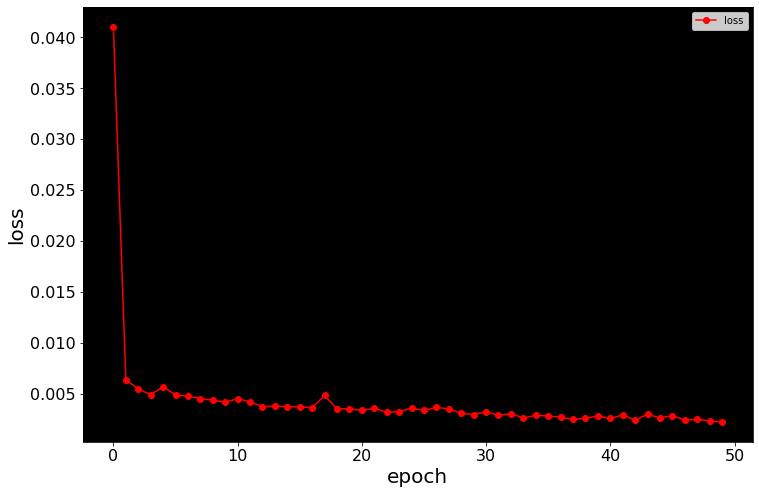

In [13]:
plt.figure(figsize=(12,8))
plt.gca().set_facecolor('k')
plt.plot(history.history['loss'], 'o-', color='red', label='loss')
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend();

In [14]:
test_df = pd.read_csv('data/Google_Stock_Price_Test.csv')
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [15]:
test_set = test_df.iloc[:,1:2].to_numpy()

In [16]:
total_dataset = np.concatenate((train_set, test_set), axis=0)
inputs = total_dataset[len(total_dataset) - len(test_set) - 60:]
inputs = sc.transform(inputs)

In [17]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])

X_test = np.array(X_test)

In [18]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [19]:
y_pred = lstm.predict(X_test)
y_pred = sc.inverse_transform(y_pred)

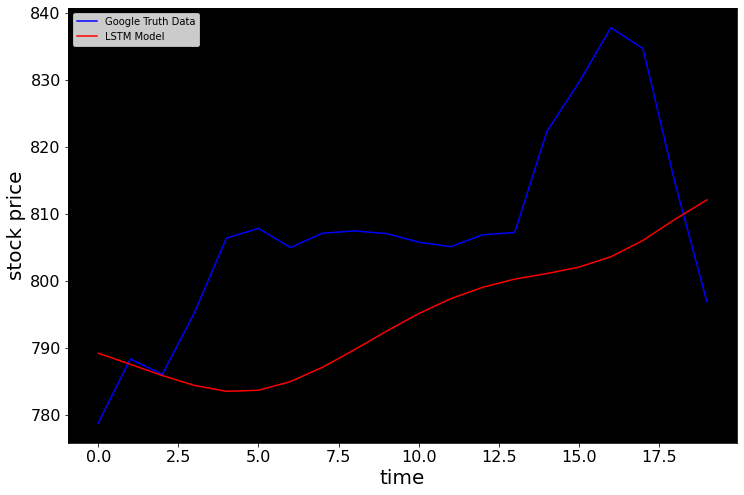

In [20]:
plt.figure(figsize=(12,8))
plt.gca().set_facecolor('k')
plt.plot(test_set, color='blue', label='Google Truth Data')
plt.plot(y_pred, color='red', label='LSTM Model')
plt.xlabel('time', fontsize=20)
plt.ylabel('stock price', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend();